In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [36]:
data = np.loadtxt('../data/3/30/L')

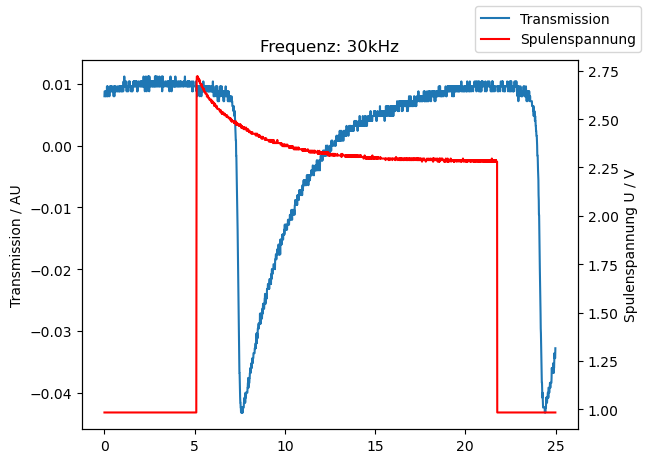

In [37]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

transmission = data[:, 2]
time = data[:, 0] * 1e3
magnetic_field = data[:, 1] / 10

ax1.set_title('Frequenz: ' + '30' + 'kHz')

ax1.plot(time, transmission, label='Transmission')
ax1.set(ylabel='Transmission / AU')
ax2.set(ylabel='Spulenspannung U / V')
ax2.plot(time, magnetic_field, c='r',label='Spulenspannung')
fig.legend()

In [38]:
offset = 512
offset2 = 2176

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (0.5, 0.5, 2.25) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, time[offset:offset2], magnetic_field[offset:offset2], p0)
m, t, b = params

print(m)
print(t)
print(b)
magnetic_field

2.452799168693196
0.34677461434195844
2.2851358308418566


array([0.984, 0.984, 0.984, ..., 0.984, 0.984, 0.984])

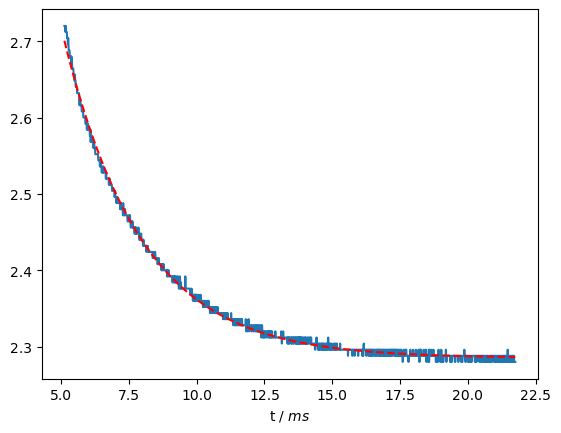

In [39]:
fig2, ax3 = plt.subplots()
ax3.set(xlabel='t / $ms$')
ax3.plot(time[offset:offset2], magnetic_field[offset:offset2], '')

ax3.plot(time[offset:offset2], monoExp(time[offset:offset2], m, t, b), 'r--', label="fitted")

In [40]:
1.682 / t

4.850412718911888